In [2]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

In [9]:
# Import "Disaster Declarations" pivot table
disaster_declare = '../orig_piv_chart.csv'
DD_df = pd.read_csv(disaster_declare, low_memory=False)
DD_df

,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,Human Cause,...,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,2.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.0,1.0,0.0,0.0,0.0,52.0,0.0,400.0,0.0,0.0,...,0.0,21.0,393.0,74.0,0.0,1.0,1.0,0.0,0.0,0.0
64,0.0,0.0,3.0,0.0,0.0,90.0,0.0,220.0,0.0,0.0,...,0.0,20.0,257.0,55.0,0.0,45.0,0.0,0.0,0.0,0.0
65,0.0,3.0,0.0,0.0,0.0,105.0,0.0,185.0,0.0,0.0,...,0.0,0.0,121.0,39.0,0.0,2.0,0.0,0.0,7.0,1.0
66,0.0,42.0,0.0,0.0,8.0,24.0,0.0,648.0,0.0,0.0,...,0.0,0.0,554.0,0.0,0.0,13.0,0.0,0.0,9.0,0.0


In [4]:
DD_df.columns

Index(['Chemical', 'Coastal Storm', 'Dam/Levee Break', 'Drought', 'Earthquake',
       'Fire', 'Fishing Losses', 'Flood', 'Freezing', 'Human Cause',
       'Hurricane', 'Mud/Landslide', 'Other', 'Severe Ice Storm',
       'Severe Storm(s)', 'Snow', 'Terrorist', 'Tornado', 'Toxic Substances',
       'Tsunami', 'Typhoon', 'Volcano'],
      dtype='object')

In [25]:
# Rank the disasters in order of descending counties affected
ranks_df = DD_df.sum().sort_values(ascending = False)
# set the dataframe
ranks_df =ranks_df.reset_index()

In [30]:
# rename the columns
ranks_df = ranks_df.rename(columns = {"index": "Disasters", 0:"Total"})
# check the dataframe
ranks_df

,Disasters,Total
0,Severe Storm(s),16683.0
1,Hurricane,10876.0
2,Flood,10335.0
3,Snow,3659.0
4,Fire,3316.0
5,Severe Ice Storm,1990.0
6,Tornado,1445.0
7,Drought,1292.0
8,Coastal Storm,507.0
9,Freezing,301.0


In [34]:
# Summing all the disasters
disaster_sum = ranks_df['Total'].sum()
disaster_sum

51113.0

In [71]:
# Creating a new column calculating percentage of disasters from year 2013-2020
ranks_df['Percentage_of_disasters'] = ((ranks_df['Total'])/(disaster_sum))
ranks_df['Percentage_of_disasters']=ranks_df['Percentage_of_disasters'].map("{:,.2%}".format)
ranks_df

,Disasters,Total,Percentage_of_disasters
0,Severe Storm(s),16683.0,32.64%
1,Hurricane,10876.0,21.28%
2,Flood,10335.0,20.22%
3,Snow,3659.0,7.16%
4,Fire,3316.0,6.49%
5,Severe Ice Storm,1990.0,3.89%
6,Tornado,1445.0,2.83%
7,Drought,1292.0,2.53%
8,Coastal Storm,507.0,0.99%
9,Freezing,301.0,0.59%


<IPython.core.display.Javascript object>


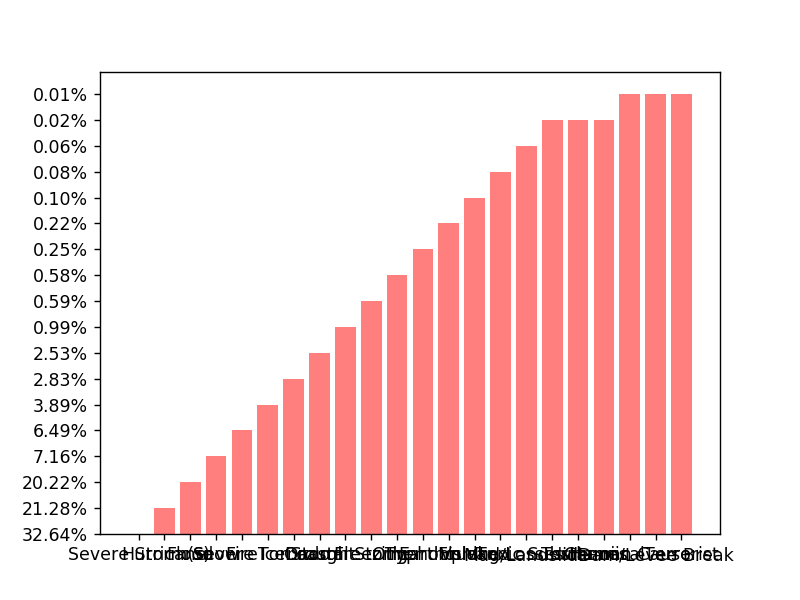

<BarContainer object of 22 artists>

In [68]:
x_axis = ranks_df['Disasters']
y_axis = ranks_df['Percentage_of_disasters']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align ="center")

In [62]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis)

([<matplotlib.axis.XTick at 0x146c4ee9c50>,
 <a list of 22 Text xticklabel objects>)

In [63]:
plt.xlim(-0.75, len(x_axis) -0.25)

(-0.75, 21.75)

In [64]:
plt.ylim(0, len(y_axis) + 78)

(0, 100)

In [65]:
plt.title("Percentage of Disasters from 2013-2020")
plt.xlabel("Disasters")
plt.ylabel("Percentage")
plt.show()

In [ ]:
# Create arch-categories [human-based, heat-based, cold-based, precipitation based, geology-based] and create a pie chart a)overall and b) by decade